<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Coursework 6</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Nicola Perra </h3>
        </td>
    </tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_array_almost_equal, assert_array_equal
%matplotlib inline

/home/sami/miniforge3/envs/ML/lib/python3.11/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


### Ridge regression
By completing this exercise you will write a set of functions that are used for building a ridge regression for a given data samples. You will then learn how to perform K-cross validation for a hyperparameter selection. You will finish with applying the above methods to a real data, that needs to be standardised first.


1. Implement function **ridge_regression_data** that computes (and outputs) the ridge regression data matrix $\Phi\left(\mathbf{X}\right)$ defined as
- if a degree is given and it is larger than $1$ then the data matrix should coincide with the polynomial basis matrix
$$
\Phi\left(\mathbf{X}\right) = 
\begin{pmatrix}
1 & \left(x^{(1)}\right)^1 & \left(x^{(1)}\right)^2 & \ldots & \left(x^{(1)}\right)^d \\
1 & \left(x^{(2)}\right)^1 & \left(x^{(2)}\right)^2 & \ldots & \left(x^{(2)}\right)^d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & \left(x^{(s)}\right)^1 & \left(x^{(s)}\right)^2 & \ldots & \left(x^{(s)}\right)^d 
\end{pmatrix}
$$
- otherwise, if the degree is not provided or if it is equal to $1$, then the ridge regression data matrix should coincide with the linear regression data matrix, i.e.
$$
\Phi\left(\mathbf{X}\right) = 
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}
$$
The function **ridge_regression_data**
should take the $1$ compulsory argument *data_inputs* and $1$ optional argument *degree*
- NumPy array *data_inputs* representing a list of inputs $x^{(1)}, x^{(2)}, \ldots, x^{(s)}$. Each of $x^{(i)}$ is either a vector in the case of linear ridge regression ($d=1$) or a scalar in case of polynomial regression ($d>1$)
- and integer *degree* representing the degree $d$ of a polynomial.

In [2]:
def ridge_regression_data(data_inputs, degree=1):

    # this function does not produce a polynomial basis, if data_inputs.ndim>1 it assumes d=1
    if (degree > 1 and data_inputs.ndim > 1):
        raise NotImplementedError()
    
    # if the input is just a vector we use a polynomial regression
    if (data_inputs.ndim == 1):
        X_matrix = np.ones((len(data_inputs), 1))
        for i in range(degree):
            X_matrix = np.c_[X_matrix, np.power(data_inputs, i + 1)]
    else:
        first_column = np.ones((len(data_inputs), 1))
        X_matrix = np.c_[first_column, data_inputs]
        
    return X_matrix

Test your function with the following unit tests

In [3]:
test_inputs = np.array([1, 2, 3, 4])
test_degree = 2
ridge_regression_data(test_inputs, test_degree)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [4]:
test_inputs = np.array([[10, 20], [12, 34], [43, 44], [44, 45]])
ridge_regression_data(test_inputs)

array([[ 1., 10., 20.],
       [ 1., 12., 34.],
       [ 1., 43., 44.],
       [ 1., 44., 45.]])

2. Write a function **ridge_regression** that takes three arguments *data_matrix*, *data_outputs* and *regularisation*, which computes and returns the solution $\hat{\mathbf{W}}$ of the normal equation
$$
\left(\Phi^{\top}\left(\mathbf{X}\right)\Phi\left(\mathbf{X}\right) +\alpha I \right)\hat{\mathbf{W}} = \Phi^{\top}\left(\mathbf{X}\right)\mathbf{Y}
$$
Here $\Phi\left(\mathbf{X}\right)$  is the mathematical representation of *data_matrix*,
$\mathbf{Y}$ is the mathematical representation of *data_outputs* and $\alpha$ is the mathematical representation of *regularisation*, while $\hat{\mathbf{W}}$ is a mathematical representation for coefficients of the ridge regression.

In [5]:
def ridge_regression(data_matrix, data_outputs, regularisation=0):
    return np.linalg.solve(data_matrix.T @ data_matrix +regularisation * np.identity(len(data_matrix.T)),
                           data_matrix.T @ data_outputs)

Test your function with the following unit tests

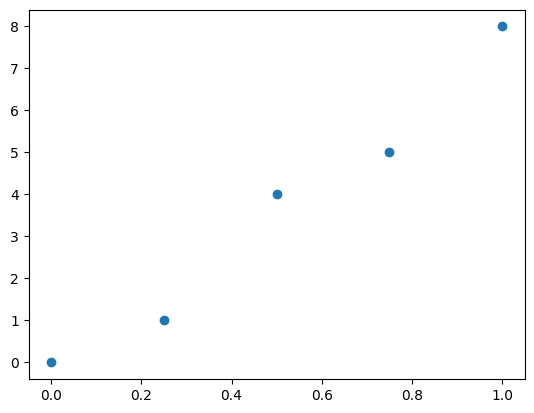

In [6]:
test_inputs = np.array([0, 1 / 4, 1 / 2, 3 / 4, 1])
test_outputs = np.array([0, 1, 4, 5, 8])
plt.scatter(test_inputs,test_outputs)
plt.show()

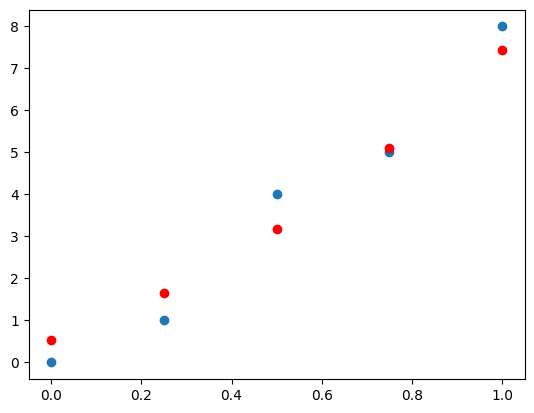

In [7]:
test_degree = 2
regularisation = 0.2
test_data_matrix = ridge_regression_data(test_inputs, test_degree)
weights=ridge_regression(test_data_matrix, test_outputs, regularisation)
prediction=test_data_matrix@weights

plt.scatter(test_inputs,test_outputs)
plt.scatter(test_inputs,prediction,color='Red')
plt.show()

3. Write a function **prediction_function** that evaluates your predicted regression function at the given points $\mathbf{X} = 
\left\{x^{(1)}, x^{(2)}, \ldots, x^{(s)}\right\}$ for given coefficients $\mathbf{W} = \left(w^{(0)}, w^{(1)},\ldots,w^{(d)}\right)$. The function **prediction_function** takes the arguments *data_matrix* and *weights* as inputs and returns a value of the regression function evaluated for every $x \in \mathbf{X}$ via
$$
f_{\mathbf{W}}\left(\mathbf{x}\right)
= w^{(0)}+w^{(1)}x_1+\ldots+w^{(d)}x_d,
$$
or
$$
f_{\mathbf{W}}\left(x\right)
= w^{(0)}+w^{(1)}x+\ldots+w^{(d)}x^d,
$$
where _data_matrix_ is a NumPy array representing data matrix $\Phi\left(\mathbf{X}\right)$, _weights_ is a NumPy representation of coefficients vector $\mathbf{W}$. The function should return a vector of the regression function values $\left(f_{\mathbf{W}}\left(x^{(1)}\right), f_{\mathbf{w}}\left(x^{(2)}\right), \ldots, f_{\mathbf{w}}\left(x^{(s)}\right)\right)^{\top}$.

*Hint:* consider matrix $\Phi\left(\mathbf{X}\right)\mathbf{W}$.

In [8]:
def prediction_function(data_matrix, weights):
    return data_matrix @ weights

Test your function with the following unit tests

In [9]:
test_inputs = np.array([[1, 2, 3]])
test_weights = np.array([[-1, 1], [2, 2], [-3, 3], [4, 4]])
test_data_matrix = ridge_regression_data(test_inputs)
assert_array_almost_equal(prediction_function(test_data_matrix, test_weights),
                          np.array([[7, 21]]))

4. Write a function **prediction_error** that evaluates a mean-squared error over the set of data inputs and outputs. The function **prediction_error** takes the arguments _data_matrix_, _data_outputs_ and _weights_ as inputs and returns a mean squared error defined by
$$
\mathrm{MSE} = \frac{1}{2s} \left\|\Phi\left(\mathbf{X}\right)\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\Phi\left(\mathbf{X}\right)$ is a mathematical representation of _data_matrix_, $\mathbf{Y}$ is a mathematical representation of _data_outputs_ and $\mathbf{W}$ is a mathematical representation of _weights_.

In [10]:
def prediction_error(data_matrix, data_outputs, weights):
    return 1 / (2 * len(data_matrix)) * (np.linalg.norm(data_matrix @ weights -data_outputs))**2

Test your function with the following unit tests

In [11]:
test_inputs = np.array([0, 1 / 4, 1 / 2, 3 / 4, 1])
test_data_outputs = np.array([0, 1, 0, -1, 0])
test_weights = np.array([2 / 5, -4 / 5, 6 / 5])
test_data_matrix = ridge_regression_data(test_inputs, len(test_weights) - 1)

assert_array_almost_equal(
    prediction_error(test_data_matrix, test_data_outputs, test_weights),
    0.359125)

In [12]:
test_inputs = np.array([[1, -1], [2, 2]])
test_data_outputs = np.array([[-1, 2], [1, 3]])
test_data_matrix = ridge_regression_data(test_inputs)
test_weights = np.array([[0, 0], [1, 2], [3, 4]])
assert_array_almost_equal(
    prediction_error(test_data_matrix, test_data_outputs, test_weights), 36.75)

### K-fold cross validation  
In this section you are asked to implement a number of functions that are used for a K-fold cross validation strategy as introduced in the lecture. This is a strategy for a calculation of a validation error using a smart data splitting and can be described as follows:
1. split the data, joined inputs and outputs, into $K$ approximately equal chunks. Let us call them $D_1, D_2, \ldots, D_K$;
2. for every $i = 1,\ldots,K$ evaluate optimal weights/coefficients $\mathbf{W}_i$ for the ridge regression evaluated over the data set $D_1,D_2,\ldots,D_{i-1},D_{i+1},\ldots,D_K$ and a corresponding validation error $L_i$ evaluated over the set $D_i$;
3. evaluate average of optimal weights 
$\hat{\mathbf{W}} = \frac{1}{K}\left(\mathbf{W}_1+\mathbf{W}_2+\ldots+\mathbf{W}_K\right)$ and an average validation error 
$L = \frac{1}{K}\left(L_1+L_2+\ldots+L_K\right)$.

1. Write a function **KFold_split** that takes two arguments *data_size* and *K* and outputs a random split of integer indexes $\left[0,1,\ldots,data\_size\right)$ into $K$ almost equal chunks. For example, for $K=2$ and $data\_size = 5$
it may return $[[3,0],[2,4,1]]$.

In [13]:
def KFold_split(data_size, K):
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K) # m is the quotient and r the reminder of the division data_size/K
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]

    return indexes_split

In [14]:
# let's understand a bit better what is going on in the for loop
K=3
m, r = divmod(10, K)
print (m,r)
print ('---')
for i in range(K):
    print (i * m + min(i, r),(i + 1) * m + min(i + 1, r))
# hence this effectively tries to split the data into equally sized chuncks

3 1
---
0 4
4 7
7 10


Test your function with the following unit tests

In [15]:
test_data_size = np.random.randint(low=1, high=10)
test_K = np.random.randint(low=1, high=5)
print (test_data_size,test_K )
indexes_split = KFold_split(test_data_size, test_K)
print (indexes_split)
data_indexes = np.array([])
for i in range(test_K):
    data_indexes = np.append(data_indexes, indexes_split[i])
data_indexes = np.sort(data_indexes)
assert_array_almost_equal(data_indexes, np.array(range(test_data_size)))

1 1
[array([0])]


2. Write a function **KFold_cross_validation** that takes $5$ arguments
- *data_matrix* - a data matrix containing all inputs in an appropriate form (see **Ridge regression** section)
- *data_outputs* - a data matrix containing all outputs in a matrix form
- *K* - a positive integer number representing the number of chunks used for a validation algorithm
- *model_evaluation* - a lambda-function that takes two parameters *data_matrix* and *data_outputs*, and evaluates optimal weights/coefficients/parameters of some ML model
- *error_evaluation* - a lambda-function that takes three parameters *data_matrix*, *data_outputs*, and *weights* and evaluates a validation error.

For an example of two last functions see the test below.

The function **KFold_cross_validation** should return a matrix/vector of coefficients/weights and a validation error that are both evaluated as averages of optimal weights and validation error of every iteration step.

In [16]:
def KFold_cross_validation(data_matrix, data_outputs, K, model_evaluation,error_evaluation):

    data_size = len(data_matrix)
    # Partition data indicies, get K folds.
    indexes_split = KFold_split(data_size, K)
    # each indexes_split[j] is an array with the ids of the data matrix for that split
    # all the others ids can be used for training and the j for validation
    for i in range(K):
        # hence this concatenates all the ids of the data matrix EXCEPT for those in the i split
        # those are used for validation!
        indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        # training the model in all the data EXCEPT for the i split
        weights = model_evaluation(data_matrix[indexes], data_outputs[indexes]) 
        # the error is computed OUT OF SAMPLE in the i split
        error = error_evaluation(data_matrix[indexes_split[i]],data_outputs[indexes_split[i]], weights)
        # then the overall performance is measured as the average of the error for each split
        # and the weights are also averaged
        if (i == 0):
            optimal_weights = weights / K
            validation_error = error / K
        else:
            optimal_weights += weights / K
            validation_error += error / K
            
    return optimal_weights, validation_error

Let's see how to use it

In [17]:
model_evaluation = lambda data_matrix, data_outputs: ridge_regression(data_matrix, data_outputs, regularisation=0.1)
error_evaluation = lambda data_matrix, data_outputs, weights: prediction_error(data_matrix, data_outputs, weights)

inputs = np.array([0, 1 / 4, 1 / 2, 3 / 4, 1])
data_outputs = np.array([0, 1, 0, -1, 0])

data_matrix=ridge_regression_data(inputs, 2)

KFold_cross_validation(data_matrix, data_outputs, 3, model_evaluation,error_evaluation)

(array([ 0.34942783, -0.46609676, -0.47047088]),
 np.float64(0.5527385955699171))

### Data standardisation 
In real-world problems we usually get a raw data in the form of $s$ samples each of which is described by numeric several values corresponding to different characteristics of the object. Such a data could be highly non-uniform. The goal of applying $\textit{standardisation}$ is to make sure different features of objects are on almost on the same scale so that each feature is equally important and make it easier to process by most ML algorithms. The result of standardisation is that the features will be rescaled to ensure the mean and the standard deviation to be $0$ and $1$, respectively. This means that for a data given by $\mathbf{X} = \left(
\left(\mathbf{x}^{(1)}\right)^{\top},\left(\mathbf{x}^{(2)}\right)^{\top},\ldots,\left(\mathbf{x}^{(s)}\right)^{\top}
\right) \in \mathbb{R}^{s\times d}$ we define a new, rescaled data as:
$$
\hat{\mathbf{x}}^{(i)}_k = \frac{\mathbf{x}^{(i)}_k - \left\langle \mathbf{x}_k \right\rangle }{\left(\sigma_{\mathbf{x}}\right)_k},
$$
where $\left\langle \mathbf{x}_k \right\rangle = \frac{1}{s}\sum\limits_{j=1}^s \mathbf{x}^{(j)}_k$, and
$\left(\sigma_\mathbf{x}\right)_k = \sqrt{
	\frac{1}{s}\sum\limits_{j=1}^s \left(\mathbf{x}^{(j)}_k-\left\langle \mathbf{x}_k \right\rangle\right)^2}$
are the mean and standard deviation of data vector $\mathbf{x}$.  

Write two functions 
1. **standardise** to standardise the columns of a multi-dimensional array. The function **standardise**	takes the multi-dimensional array *data_matrix* as its input argument. It subtracts the means from each column and divides by the standard deviations. It returns the *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations*.
2. **de_standardise** to de-standardise the columns of a multi-dimensional array. The function **de_standardise** reverses the above operation. It takes a *standardised_matrix*, the *row_of_means* and the *row_of_standard_deviations* as its arguments and returns a matrix for which the standardisation process is reversed.

In [18]:
def standardise(data_matrix):
    
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(data_matrix, axis=0)
    
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

Test your function with the following unit tests

In [19]:
test_data_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
test_standardise_data_matrix = np.array([[-1.224745, -1.224745, -1.224745],
                                         [0., 0., 0.],
                                         [1.224745, 1.224745, 1.224745]])
test_row_of_means = np.array([4, 5, 6])
test_row_of_stds = np.array(np.sqrt([6, 6, 6]))

test_result_standardise_data_matrix, test_result_row_of_means, test_result_row_of_stds = standardise(
    test_data_matrix)
assert_array_almost_equal(test_result_standardise_data_matrix,
                          test_standardise_data_matrix)
assert_array_almost_equal(test_result_row_of_means, test_row_of_means)
assert_array_almost_equal(test_result_row_of_stds, test_row_of_stds)

In [20]:
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means

### Boston housing price data
Finally, we are going to apply all our tools for training a model predicting housing prices in Boston. In this exercise you will work with a real housing price data. The assignment folder contains house_prices.csv file which you will need to read the data from. This file contains an information about $N = 1200$ houses. The data columns are:
- $\texttt{StreetLength}$ - length of the street in front of the building
- $\texttt{Area}$ - total area of the lot
- $\texttt{Quality}$ - quality of building materials
- $\texttt{Condition}$ - condition of the building
- $\texttt{BasementArea}$ - area of the basement
- $\texttt{LivingArea}$ - total living area
- $\texttt{GarageArea}$ - a garage area		
- $\texttt{SalePrice}$ - sale price

Your task would be to build a ridge regression using $K$-fold cross validation strategy for validation and a grid search strategy for optimisation of the hyperparameter $\alpha$ value.

1. We start by loading the data. Please run the below cell to read the data from a .csv file. Make sure the .csv file is in the same folder with your Jupyter notebook.

In [21]:
housing_dataset_path = "house_prices.csv"
housing_data = np.genfromtxt(housing_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[0, 1, 2, 3, 4, 5, 6, 7])
housing_data_input = housing_data[:, 0:7]
housing_data_output = housing_data[:, 7]

2. We then prepare the data for an analysis. You will need to standardise the inputs and outputs using the functions you developed before.

In [22]:
standardised_housing_data_input, means_housing_data_input,stds_housing_data_input = standardise(housing_data_input)
standardised_housing_data_output, means_housing_data_output,stds_housing_data_output = standardise(housing_data_output)

3. Write a function **grid_search** that performs a search for a minimum value of a given function on a given grid points. You function should have a signature *grid_search (objective, grid)*, where *objective* is a lambda-function to minimise and *grid* is a list of grid points. The function should return the grid point with the minimal value of objective function.

In [23]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

Test your function with the following unit tests

In [24]:
test_function = lambda xy: xy[0]**2 + xy[1]**2 - 2 * xy[0] * xy[1]
test_grid = [(0, 1), (1, 0), (2, 3), (5, 5)]
assert_array_almost_equal(grid_search(test_function, test_grid), (5, 5))

4. Implement a grid search algorithm to find an unknown hyperparameter $\hat \alpha$ such that
$$
\hat{\alpha} = \arg\min\limits_{\alpha\geq 0} \mathrm{Val}\left( \mathbf{W}_{\alpha}\right),
$$
where the validation error $\mathrm{Val}\left( \mathbf{W}_{\alpha}\right)$ is evaluated using K-fold cross validation. Take $K=5$. Print out an optimal coefficients.

In [25]:
K = 5
alpha_grid = np.append(np.array([i * 0.05 for i in range(20)]),
                       np.array([i for i in range(1, 20)]))


error_evaluation = lambda data_matrix, data_outputs, weights: prediction_error(data_matrix, data_outputs, weights)

# the objective function is the validation error computed for each alpha value in the grid below
validation_error = lambda alpha: KFold_cross_validation(standardised_housing_data_input,
                                                        standardised_housing_data_output, 
                                                        K,lambda data_matrix,
                                                        data_outputs: ridge_regression(data_matrix,
                                                                                       data_outputs,
                                                                                       regularisation=alpha),
                                                        error_evaluation)[1]




optimal_alpha = grid_search(validation_error, alpha_grid)

optimal_weights = KFold_cross_validation(standardised_housing_data_input,
                                         standardised_housing_data_output, 
                                         K,lambda data_matrix,
                                         data_outputs: ridge_regression(data_matrix, 
                                                                        data_outputs,
                                                                        regularisation =optimal_alpha),
                                         error_evaluation)[0]

print(
"An optimal value of regularisation parameter is {}.\nFor this value of regularisation parameter one gets optimal weights of the form \n{}".format(optimal_alpha, optimal_weights))

An optimal value of regularisation parameter is 0.25.
For this value of regularisation parameter one gets optimal weights of the form 
[-0.00878424  0.06814844  0.45860821  0.03299914  0.14794164  0.26672277
  0.15639832]


In [26]:
# let us get the names of the features from the data
# they are the header of the file
a=open(housing_dataset_path,'r')
for i in a:
    features=i.strip().split(',')
    break
a.close()
# we need to delete the last since that is the target!
features.pop()

# now we can get the order of the weights in terms of their values
c=0
list_features=[]
for i in optimal_weights:
    list_features.append([i,features[c]])
    c+=1

list_features=sorted(list_features,reverse=True)
for i in list_features:
    print (i)

[np.float64(0.458608209135359), 'Quality']
[np.float64(0.26672276786603466), 'LivingArea']
[np.float64(0.1563983183108458), 'GarageArea']
[np.float64(0.1479416402599611), 'BasementArea']
[np.float64(0.06814844302606977), 'Area']
[np.float64(0.03299914006925013), 'Condition']
[np.float64(-0.008784243704817996), 'StreetLength']


## Bootstrapping

In [27]:
# to bootstrap we need to select N samples from the data with replacement
# this means that we can just get N random numbers from 0 to len(data)-1 
# indeed in this type of sampling the probability that one will be selected is constant 1/len(data)
# we can pick N as 90% of the total sample size
import random as rd
data_size=len(standardised_housing_data_output)
fraction=0.9
samples_size=int(data_size*fraction)

sample_input_list=[]
sample_output_list=[]
for i in range(samples_size):
    id_random=rd.randint(0,samples_size-1)
    sample_input_list.append(standardised_housing_data_input[id_random])
    sample_output_list.append(standardised_housing_data_output[id_random])
    
sample_input=np.array(sample_input_list)
sample_output=np.array(sample_output_list)

# now can can create a function that does this plus for each sample compute the regression


In [28]:
import random as rd
def bootstrap_regression(standardised_data_input,standardised_data_output,fraction,M,alpha):
    # first we need to know what is N: the number of samples to extract
    data_size=len(standardised_data_output)
    samples_size=int(data_size*fraction)

    w_list=[]
    # then for each of the M extract
    for j in range(M):
        sample_input_list=[]
        sample_output_list=[]
        for i in range(samples_size):
            # we take N samples extract random numbers which are the id of the arrays that store the data
            id_random=rd.randint(0,samples_size-1)
            # note that we need to keep the X and Y correspondence hence the id_random is the same for each
            sample_input_list.append(standardised_data_input[id_random])
            sample_output_list.append(standardised_data_output[id_random])

        # convert the list to arrays
        sample_input=np.array(sample_input_list)
        sample_output=np.array(sample_output_list)

        # apply the regression, note that alpha is selected before with the model selection
        weights=ridge_regression(sample_input, sample_output, regularisation=alpha)
        # append the fitted values of Ws for the N samples in list
        w_list.append(weights)
    return w_list

In [29]:
M=10000
# note how the alpha is selected in the model selection before!
w_list=bootstrap_regression(standardised_housing_data_input,standardised_housing_data_output,0.9,M,optimal_alpha)

# now we have a list with all the values of w for each of the M samples
# we can create a dictionary to get the values for each features
dict_w={}
for i in range(len(features)):
    dict_w[i]=[]

# append the values to each feature as list
for i in range(M):
    w=w_list[i]
    for j in range(len(w)):
        dict_w[j].append(w[j])
        
for i in dict_w:
    dict_w[i]=np.array(dict_w[i]) # first convert the list into a nunpy array then we can manipulate them
    print (features[i],np.mean(dict_w[i])) # get for example the mean


StreetLength -0.008377129528592186
Area 0.07533099830019248
Quality 0.4606461058516605
Condition 0.03406871925234019
BasementArea 0.14580549722945826
LivingArea 0.2776609092613654
GarageArea 0.15928724569569555


In [30]:
# we can then use seaborn to plot, this requires pandas
# let us first create the data for the df
# this function takes the features and the list of w from the bootstrap, it write the data into a file for simplicity
import pandas as pd

def get_df(features,w_list):
    # let's first create the headers of the file
    a=open('data_for_plot.csv','w')
    for j in range(len(features)-1):
        a.write(features[j]+',')
    a.write(features[-1]+'\n')

    # then we can write the data
    for j in w_list:
        for i in range(len(j)-1):
            a.write(str(j[i])+',')
        a.write(str(j[-1])+'\n')
    a.close()
    df=pd.read_csv('data_for_plot.csv')
    
    return df

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import seaborn as sns
df=get_df(features,w_list) # get the dataframe


sns.boxplot(data=df) # make the plot with seaborn
plt.xticks(rotation=45)
plt.ylabel('w')
plt.show()